Measurement of an algorithm is made by running the algorithm several times and averaging the time. It is supposed that an algorithm does not modify an input, so it can be resused for several iterations.

In [1]:
import time

def measure_time_ns(action, iterations):
    start_time = time.time_ns()
    for _ in range(iterations):
        action()
    end_time = time.time_ns()
    return (end_time - start_time) / iterations

def measure_average_time_ns_in_range(procedure, input_generator_int, iterations, inputs_range):
    result = [0.0] * len(inputs_range)
    for i, n in enumerate(inputs_range):
        input_data = input_generator_int(n)
        result[i] = measure_time_ns(lambda: procedure(input_data), iterations)
    return result

Measurements are made for every $n$ in $[1, 2000]$. The measurement result is an average time of $5$ iterations.

In [2]:
def measure_algorithm(procedure, input_generator_int, max_n=2000):
    inputs_range = list(range(1, max_n + 1))
    times_ns = measure_average_time_ns_in_range(procedure, input_generator_int, 5, inputs_range)
    return inputs_range, times_ns

We can provide a theoretical complexity of algorithm as $O(f(n))$ for some function $f$. In order to say what constants $c, p$ can be used to provide a sertain prediction such that $T(n) \approx c \cdot f(n) + p$, we can use linear regression.

In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np

def find_const(inputs_range, times_ns, expected_time):
    expected_times = np.array([expected_time(n) for n in inputs_range]).reshape(-1, 1)
    model = LinearRegression()
    model.fit(expected_times, times_ns)
    c, p = model.coef_[0], model.intercept_
    return c, p, expected_times * c + p
    

Measurements results are presented in a plot where each input corresponds to a point. Theoretical complexity with adopted constant is presented as a line.

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

plt.rc('figure', figsize=(10, 7))

def plot_measurements(inputs_range, times_ns, title, expected_time=None, label="", expected_label=""):
    scale = 1e3
    plt.plot(inputs_range, np.array(times_ns) / scale, 'o', label=label, markersize=2)
    scale = 1e3    
    if expected_time is not None:
        c, p, expected_times = find_const(inputs_range, times_ns, expected_time)
        c /= scale
        p /= scale
        expected_label = "  T(n) ~ %.2f * " % c + expected_label + " + %.2f (us)" % p
        print("rmse = %f (us)" % mean_squared_error(np.array(times_ns) / scale, expected_times / scale, squared=False))
        plt.plot(inputs_range, expected_times / scale)
    plt.title(title + expected_label)
    plt.xlabel('input size')
    plt.ylabel('algorithm execution time (us)')

# Task 1

In [5]:
import random

def generate_random_vector(n):
    return [random.random() for _ in range(n)]

In [6]:
measurement_results = {}

def plot_algorithm(algorithm, label, expected_time, max_n=2000, expected_label=""):
    inputs_range, times_ns = measure_algorithm(algorithm, generate_random_vector, max_n)
    measurement_results[label] = (inputs_range, times_ns)
    plot_measurements(inputs_range, times_ns, label, expected_time, expected_label=expected_label)

## 1) const function $O(1)$

rmse = 0.217840 (us)


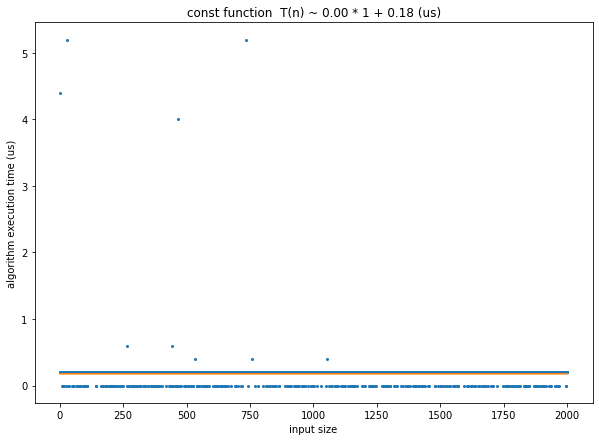

In [7]:
def const_function(vector):
    return 42

plot_algorithm(const_function, "const function", lambda n: 1, expected_label="1")
plt.show()

## 2) sum $O(n)$

rmse = 3.593978 (us)


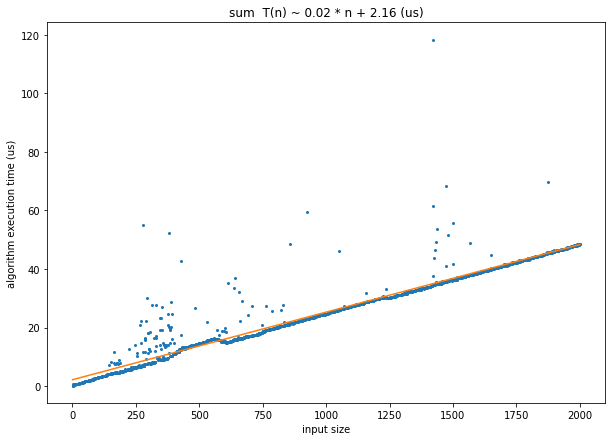

In [8]:
def sum_function(vector):
    result = 0.0
    for x in vector:
        result += x
    return result

plot_algorithm(sum_function, "sum", lambda n: n, expected_label="n")
plt.show()

## 3) product $O(n)$

rmse = 5.044667 (us)


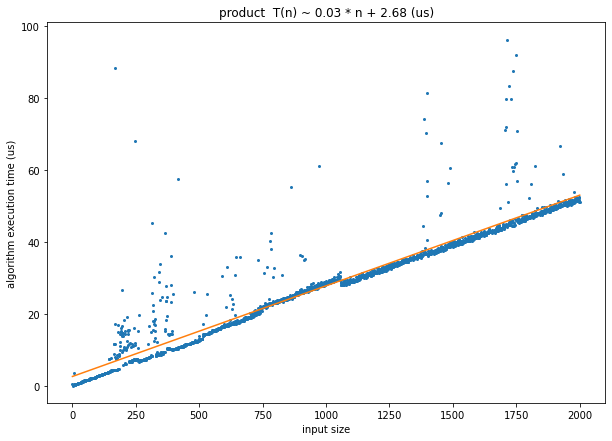

In [9]:
def product_function(vector):
    result = 1.0
    for x in vector:
        result *= x
    return result

plot_algorithm(product_function, "product", lambda n: n, expected_label="n")
plt.show()

## 4a) polynomial evaluation $O(n^2)$

rmse = 662.797992 (us)


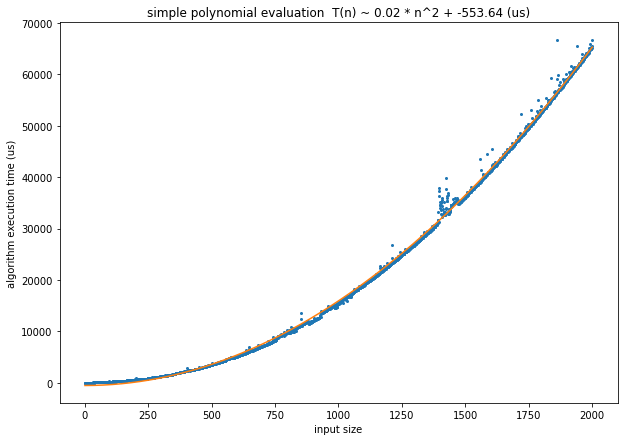

In [10]:
def power(x, n):
    result = 1.0
    for _ in range(n):
        result *= x
    return result

def simple_poly_eval_function(vector):
    result = 0.0
    x = 1.5
    for n, a in enumerate(vector):
        result += a * power(x, n)
    return result

plot_algorithm(simple_poly_eval_function, "simple polynomial evaluation", lambda n: n ** 2, expected_label="n^2")
plt.show()

## 4b) polinomial evaluation with Horner's method $O(n)$

rmse = 5.963832 (us)


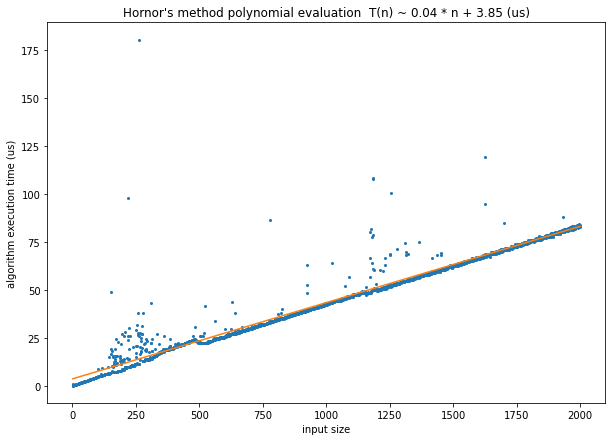

In [11]:
def horner_poly_eval_function(vector):
    result = 0.0
    x = 1.5
    for a in reversed(vector):
        result *= x
        result += a
    return result

plot_algorithm(horner_poly_eval_function, "Hornor's method polynomial evaluation", lambda n: n, expected_label="n")
plt.show()

In [12]:
!pip3 install sorting

import sorting

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


## 5) Bubble sort $O(n^2)$

rmse = 3066.396771 (us)


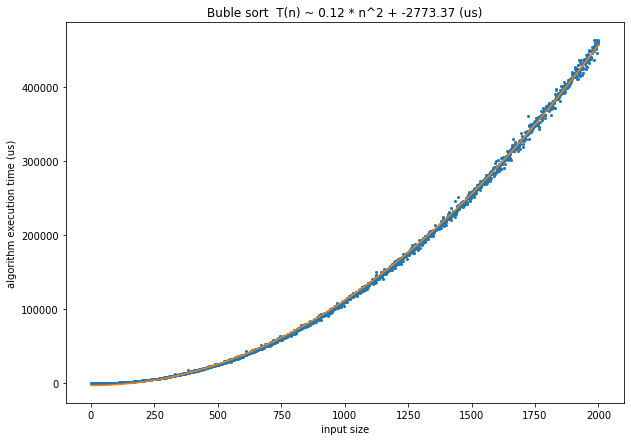

In [13]:
def bubble_sort(vector):
    return sorting.bubble(vector.copy())

plot_algorithm(bubble_sort, "Buble sort", lambda n: n ** 2, expected_label="n^2")
plt.show()

## 6) Quick sort $O(n\log n)$ randomised

rmse = 98.121049 (us)


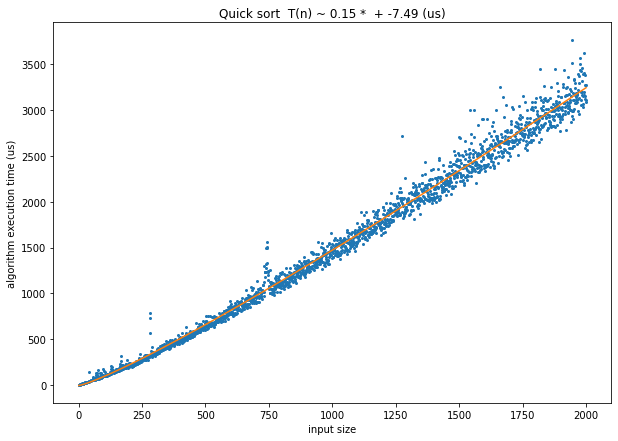

In [14]:
import math

def quick_sort(vector):
    return sorting.quick(vector.copy())

plot_algorithm(quick_sort, "Quick sort", lambda n: n * math.log2(n))
plt.show()

## 7) Tim sort $O(n\log n)$

rmse = 5.410789 (us)


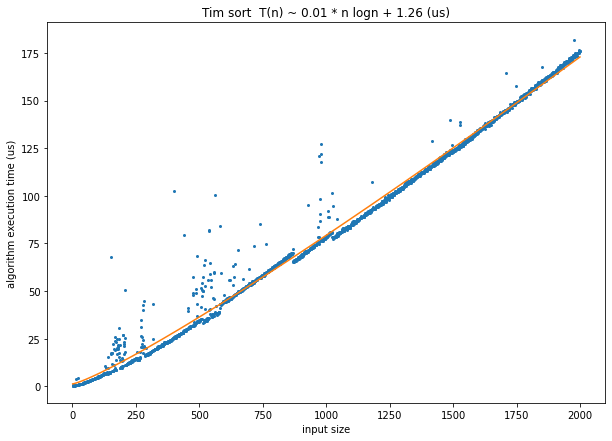

In [15]:
def tim_sort(vector):
    return sorted(vector.copy())

plot_algorithm(tim_sort, "Tim sort", lambda n: n * math.log2(n), expected_label="n logn")
plt.show()

# Task 2
## Matrix multiplication $O(n^3)$

In [16]:
def generate_random_matrix(n):
    return [[random.random() for _ in range(n)] for _ in range(n)]

def generate_2_matrixs(n):
    return generate_random_matrix(n), generate_random_matrix(n)

$A \cdot B = C$

$C_{ij} = \sum_{k} A_{ik} \cdot B_{kj}$

rmse = 99700.794389 (us)


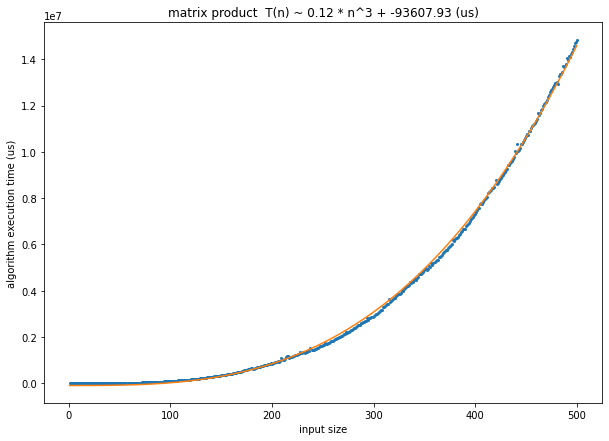

In [20]:
def matrix_product(input_data):
    a, b = input_data
    n = len(a)
    c = [[0.0] * n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            for k in range(n):
                c[i][j] = a[i][k] * b[k][j]
    return c

inputs_range, times_ns = measure_algorithm(matrix_product, generate_2_matrixs, max_n=500)
measurement_results["matrix product"] = (inputs_range, times_ns)
plot_measurements(inputs_range, times_ns, "matrix product", lambda n: n ** 3, expected_label="n^3")
plt.show()

In [18]:
def compare_algorithms(names):
    for name in names:
        inputs_range, times_ns = measurement_results[name]
        plot_measurements(inputs_range, times_ns, "", None, name)
    plt.title("Algorithms comparisent")
    plt.legend()
    plt.show()

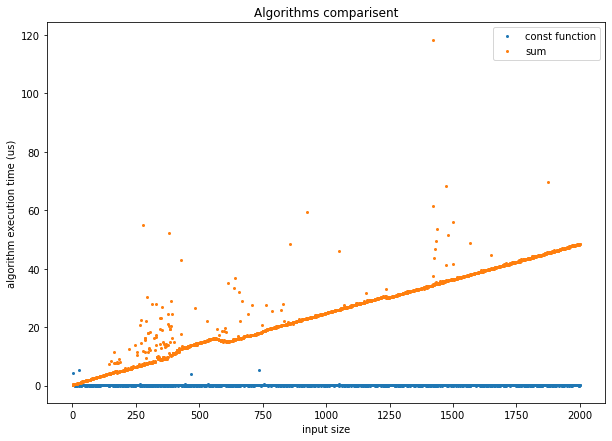

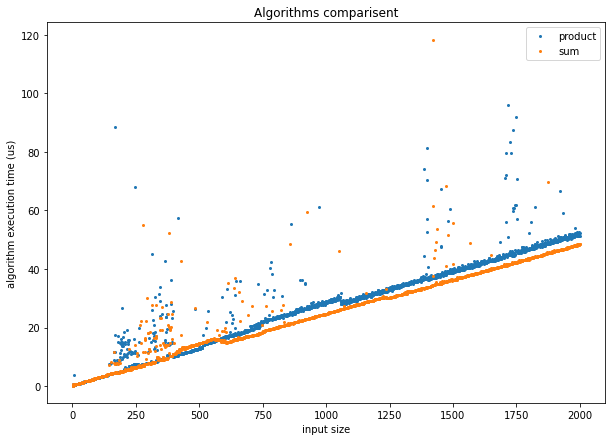

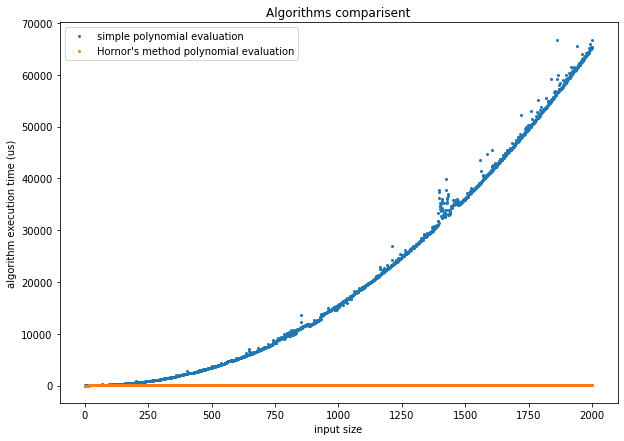

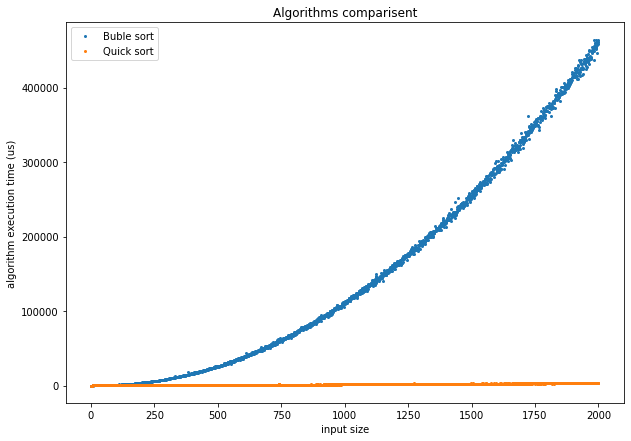

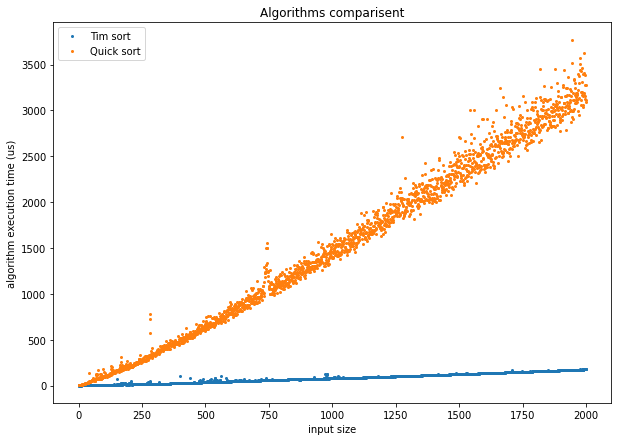

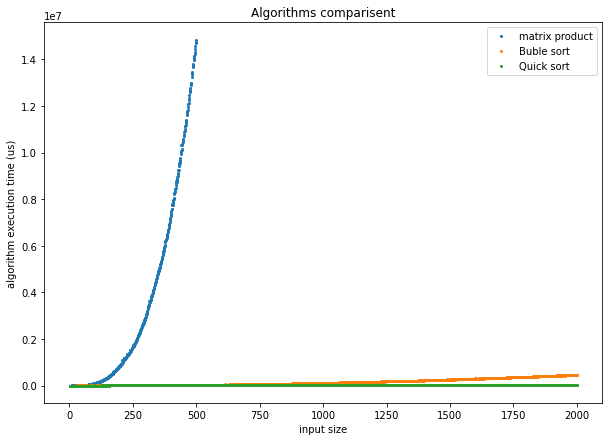

In [22]:
compare_algorithms(["const function", "sum"])
compare_algorithms(["product", "sum"])
compare_algorithms(["simple polynomial evaluation", "Hornor's method polynomial evaluation"])
compare_algorithms(["Buble sort", "Quick sort"])
compare_algorithms(["Tim sort", "Quick sort"])
compare_algorithms(["matrix product", "Buble sort", "Quick sort"])